In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import pandas as pd
import operator
%matplotlib inline

In [10]:
class Environment:
    def __init__(self,urn, groups, mius, noise, tao, rewards, residuals):
        self.urn=urn
        self.groups=groups
        self.mius=mius
        self.noise=noise
        self.tao=tao
        self.rewards=rewards
        self.residuals=residuals
    def total_groups(self):
        '''Retorna el número de grupos'''
        return(len(set(self.groups)))
    
    def total_neighborhoods(self):
        '''Retorna el total del barrios'''
        return(len(self.urn))
    
    def tot_urn(self):
        '''Retorna el total de crimenes en la urna'''
        return(sum(self.urn))
    
    def rate_neighborhood(self, i):
        '''Retorna la proporción de crímenes de un barrio en la urna'''
        return(self.urn[i]/self.tot_urn())
    
    def reward_neighborhood(self, i):
        
        return(self.rewards[i])
    
    def mius_n(self):
        '''Retorna la lista de tasas de barrios, determinado por el grupo de cada uno'''
        mius=[]
        for i in range(self.total_neighborhoods()):
            mius.append(self.mius[self.groups[i]])
        return mius
    
    def noise_n(self):
        '''Retorna la lista de ruidos de barrios, determinado por el grupo de cada uno'''
        sigmas=[]
        for i in range(self.total_neighborhoods()):
            sigmas.append(self.noise[self.groups[i]])
        return sigmas       

In [17]:
def simulate_period(environment):
    
    
    #Crear el crimen y ruido de cada barrio.
    
    crime_n=[np.random.normal(loc=environment.mius[i], scale=environment.noise[i]) for i in range(environment.total_neighborhoods())]
    
    for i in crime_n:
        if i<0:       
            i=0
    
    
    # Se escoje a donde mandar Patrulleros dados los recursos
    likelihoods=[environment.rate_neighborhood(i) for i in range(environment.total_neighborhoods())]
    neighborhoods=np.random.choice(a=range(environment.total_neighborhoods()), p=likelihoods, 
                                   size=environment.tao, replace=False)
    
    # Se envían y añaden los crimenes del barrio donde vio. Además, se actualizan rewards.
    for i in neighborhoods:
        environment.urn[i]+=crime_n[i]
        environment.rewards[i]+=crime_n[i]        
    
    # Se envían añaden los crimenes a lo barrios de un mismo grupo observado.
    for i in range(environment.total_neighborhoods()):
        if (i not in neighborhoods):
            interpolation=sum([crime_n[j]*environment.groups[i,j] for j in neighborhoods])/sum([environment.groups[i,j] for j in neighborhoods])
            environment.urn[i]+=interpolation
            
    # Se actualizan residuales
    for i in range(environment.total_neighborhoods()):
        if i not in neighborhoods:
            environment.residuals[i]+=crime_n[i]

    return(environment)  

In [18]:
def simulate_n_periods(environment, n, verbose=False):
    
    history_rewards=[environment.rewards.copy()]
    history_residuals=[environment.residuals.copy()]
    history_urn=[environment.urn.copy()]
    rates=[environment.rate_neighborhood(i) for i in range(environment.total_neighborhoods())]
    history_rate_urn=[rates]
    
    for i in range(n):
        if verbose and i%100==0:
            print(i)
        
        simulate_period(environment)
        history_rewards.append(environment.rewards.copy())
        history_residuals.append(environment.residuals.copy())
        history_urn.append(environment.urn.copy())
        rates=[environment.rate_neighborhood(i) for i in range(environment.total_neighborhoods())]
        history_rate_urn.append(rates)
        
    return environment, history_rate_urn, history_urn, history_rewards, history_residuals

In [68]:
sim=np.array([[1, 5, 10, 15],[5, 1, 2, 3],[10, 2, 1, 5], [15, 3, 5, 1]])

In [69]:
sim

array([[ 1,  5, 10, 15],
       [ 5,  1,  2,  3],
       [10,  2,  1,  5],
       [15,  3,  5,  1]])

In [70]:
number_neighborhoods=4
world=Environment(urn=[40,80,20,50], groups=sim, mius=[2,3,4, 5], noise=[2,2,2,2],tao=2, 
                  rewards=[0]*number_neighborhoods, residuals=[0]*number_neighborhoods)

In [71]:
world,history_rate_urn, history_urn, history_rewards, history_residuals=simulate_n_periods(world, 100, verbose=False)

In [72]:
# Calculate True_rates
True_rates=[i/sum(world.mius) for i in world.mius]
True_rates

[0.14285714285714285,
 0.21428571428571427,
 0.2857142857142857,
 0.35714285714285715]

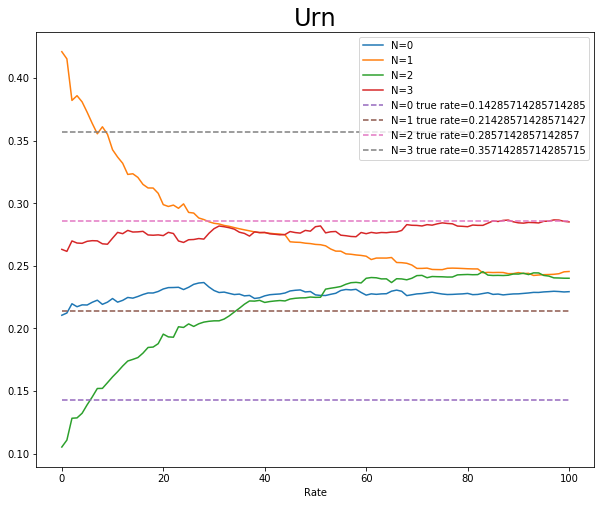

In [73]:
x_size=(len(history_rate_urn))

plt.figure(figsize=(10,8))
plt.title('Urn', fontsize=24)
for i in range(number_neighborhoods):
    plt.plot([j[i] for j in history_rate_urn], label='N='+str(i))
for i in range(len(True_rates)):
    plt.plot([True_rates[i]]*x_size, label='N='+str(i)+' true rate='+str(True_rates[i]), ls='--')
plt.xlabel('Period')
plt.xlabel('Rate')
plt.legend()

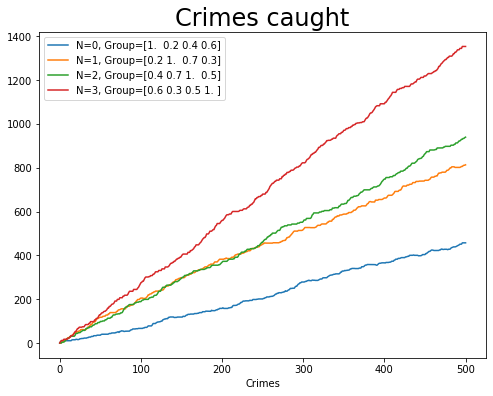

In [42]:
plt.figure(figsize=(8,6))
plt.title('Crimes caught', fontsize=24)
for i in range(number_neighborhoods):
    plt.plot([j[i] for j in history_rewards], label='N='+str(i)+', Group='+str(world.groups[i]))
plt.xlabel('Period')
plt.xlabel('Crimes')
plt.legend()

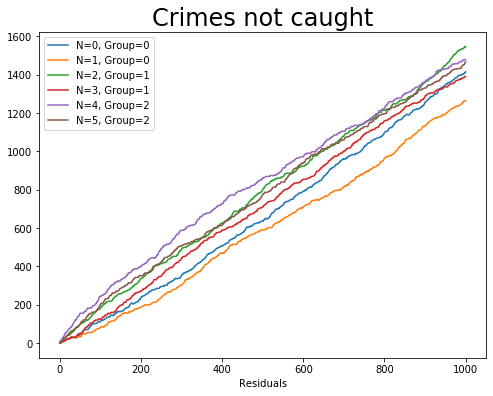

In [10]:
plt.figure(figsize=(8,6))
plt.title('Crimes not caught', fontsize=24)
for i in range(number_neighborhoods):
    plt.plot([j[i] for j in history_residuals], label='N='+str(i)+', Group='+str(world.groups[i]))
plt.xlabel('Period')
plt.xlabel('Residuals')
plt.legend()

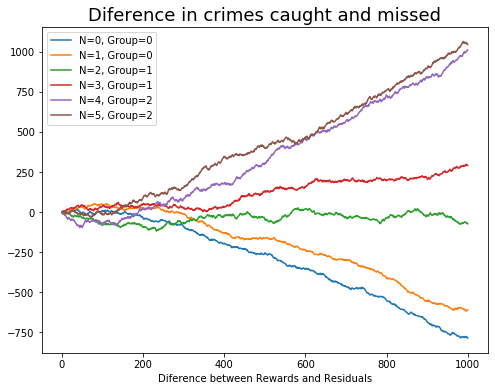

In [11]:
plt.figure(figsize=(8,6))
plt.title('Diference in crimes caught and missed', fontsize=18)
for i in range(number_neighborhoods):
    plt.plot([history_rewards[j][i]-history_residuals[j][i] for j in range(len(history_rewards))], 
             label='N='+str(i)+', Group='+str(world.groups[i]))
plt.xlabel('Period')
plt.xlabel('Diference between Rewards and Residuals')
plt.legend()

In [107]:
x=[0.2, 0.3, 0.5]
y=[0,0,1]

In [ ]:
likely=[]
for i list(set(y)):
    y.count(i)/len(y)*y.count(i)/len(y)